In [30]:
# import the libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator

In [31]:
# re-size all the images to this size
IMAGE_SIZE = [128, 128]

In [51]:
#ImageDataGenerator allows you to randomly rotate images through any degree between 0 and 360
train_datagen = ImageDataGenerator(rescale = 1./127,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./127)

In [39]:
#importing test training dataset
training_set = train_datagen.flow_from_directory(r'C:\Users\Arjun sahas\OneDrive\Desktop\intern\dataset\toy_train',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 1000 images belonging to 2 classes.


In [40]:
#importing test Dataset.
test_set = test_datagen.flow_from_directory(r'C:\Users\Arjun sahas\OneDrive\Desktop\intern\dataset\toy_val',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 200 images belonging to 2 classes.


In [48]:
#Creating a CNN model.
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(50,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 128, 128, 16)      208       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 64, 64, 32)        2080      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 32, 32, 64)        8256      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 16, 16, 64)      

In [49]:
#cost and optimization method
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [50]:
# fitting the model
cnn = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
32/32 [==============================] - 9s 288ms/step - loss: 0.7143 - accuracy: 0.6710 - val_loss: 0.3295 - val_accuracy: 0.9100
Epoch 2/10
32/32 [==============================] - 7s 229ms/step - loss: 0.3107 - accuracy: 0.8640 - val_loss: 0.1842 - val_accuracy: 0.9350
Epoch 3/10
32/32 [==============================] - 8s 237ms/step - loss: 0.2026 - accuracy: 0.9150 - val_loss: 0.4337 - val_accuracy: 0.7750
Epoch 4/10
32/32 [==============================] - 9s 267ms/step - loss: 0.1205 - accuracy: 0.9550 - val_loss: 0.0472 - val_accuracy: 1.0000
Epoch 5/10
32/32 [==============================] - 9s 277ms/step - loss: 0.0485 - accuracy: 0.9880 - val_loss: 0.0410 - val_accuracy: 1.0000
Epoch 6/10
32/32 [==============================] - 8s 239ms/step - loss: 0.0169 - accuracy: 0.9960 - val_loss: 0.0535 - val_accuracy: 0.9950
Epoch 7/10
32/32 [==============================] - 8s 246ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0955 - val_accuracy: 0.9600
Epoch 

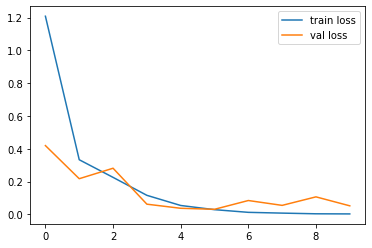

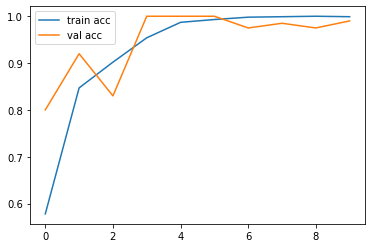

<Figure size 432x288 with 0 Axes>

In [19]:
## Plotting loss and accuracy.
plt.plot(cnn.history['loss'], label='train loss')
plt.plot(cnn.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(cnn.history['accuracy'], label='train acc')
plt.plot(cnn.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [54]:
model.save("figures.h5")